# Projet Python data visualisation  

#### Modalité d’évaluation
4 compétences évaluées \
Notation sur 20 
#### Consignes
Votre analyse devra contenir :
- Au moins 1 diagramme avec données continues, type nuage de point ou histogramme
- Au moins 2 diagramme avec des données discrètes
- Au moins 3 graphiques avec des données catégoriques
- 1 boîte à moustaches avec filtrage des données aberrantes sur le dataset (si il y en a)
- 1 heat map avec matrice de corrélation (si pertinent)
- Des commentaires clairs et pertinents pour chaque graphiques 

-------------

#### Rappel
\- Une variable est dite __quantitative__ si elle est représentée par un nombre. \
*Un âge, une distance, une durée, une note sont des variables quantitatives.* \
\- Une variable qui n'est pas quantitative est __qualitative__.  \
*Une couleur, un diplôme, un prénom sont des variables qualitatives.* \
\- Une variable quantitative est dite __discrète__ si elle ne prend que des valeurs isolées. \
*Un âge, une note arrondie au demi−point sont des variables discrètes.* \
\- Une variable quantitative est dite __continue__ si elle peut prendre toutes les valeurs comprises entre 2 nombres. \
*La distance entre le domicile et le collège est une variable quantitative continue.*

-------------

### Import des librairies nécessaires

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

sns.set()

### Récupération et affichage des données

In [2]:
# https://www.kaggle.com/blastchar/telco-customer-churn
dataset = pd.read_csv("eval.csv")
dataset_sample = dataset.sample(100)
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Age
0,7590-VHVEG,Female,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,78
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,40
2,3668-QPYBK,Male,NaN,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,20
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,45
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,24
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,68
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,44
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,90


In [3]:
# customerID        => Variable de catégorie    => Customer ID
# gender            => Variable de catégorie    => Whether the customer is a male or a female
# Age               => Variable discrète        => Age
# SeniorCitizen     => Variable discrète        => Whether the customer is a senior citizen or not (1, 0)
# Partner           => Variable de catégorie    => Whether the customer has a partner or not (Yes, No)
# Dependents        => Variable de catégorie    => Whether the customer has dependents or not (Yes, No)
# tenure            => Variable continue        => Number of months the customer has stayed with the company
# PhoneService      => Variable de catégorie    => Whether the customer has a phone service or not (Yes, No)
# MultipleLines     => Variable de catégorie    => Whether the customer has multiple lines or not (Yes, No, No phone service)
# InternetService   => Variable de catégorie    => Customer’s internet service provider (DSL, Fiber optic, No)
# OnlineSecurity    => Variable de catégorie    => Whether the customer has online security or not (Yes, No, No internet service)
# OnlineBackup      => Variable de catégorie    => Whether the customer has online backup or not (Yes, No, No internet service)
# DeviceProtection  => Variable de catégorie    => Whether the customer has device protection or not (Yes, No, No internet service)
# TechSupport       => Variable de catégorie    => Whether the customer has tech support or not (Yes, No, No internet service)
# StreamingTV       => Variable de catégorie    => Whether the customer has streaming TV or not (Yes, No, No internet service)
# StreamingMovies   => Variable de catégorie    => Whether the customer has streaming movies or not (Yes, No, No internet service)
# Contract          => Variable discrète        => The contract term of the customer (Month-to-month, One year, Two year)
# PaperlessBilling  => Variable de catégorie    => Whether the customer has paperless billing or not (Yes, No)
# PaymentMethod     => Variable de catégorie    => The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
# MonthlyCharges    => Variable continue        => The amount charged to the customer monthly
# TotalCharges      => Variable continue        => The total amount charged to the customer
# Churn             => Variable de catégorie    => Whether the customer churned or not (Yes or No)

# Problématique
 Est-ce que les charges mensuelles des clients sont liées aux services supplémentaires souscrit ?
 
 -------

### Observation des contrats souscrits
Dans un premier temps, nous pouvons observer la répartition des contrats clients et des charges totales des utilisateurs, cela nous permet de voir une première visualisation des données analysées ensuite.

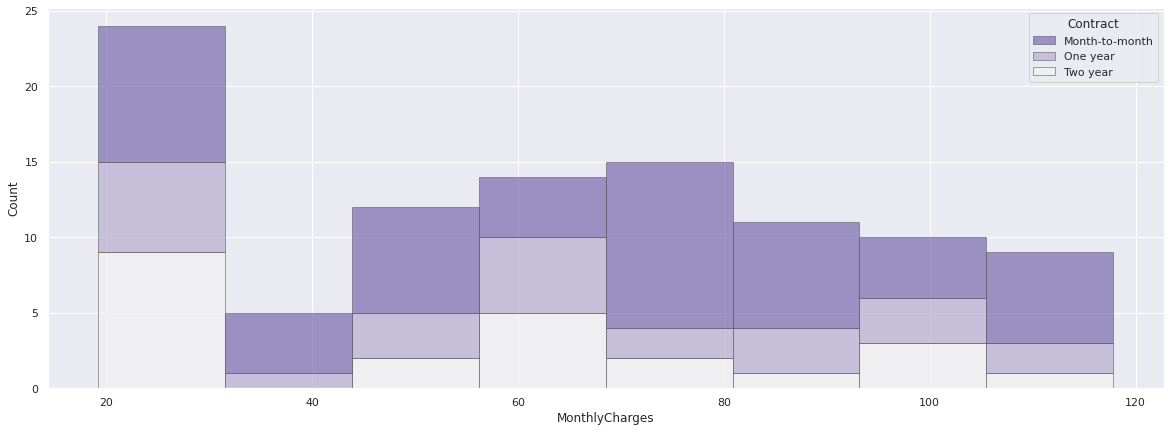

In [4]:
# https://seaborn.pydata.org/examples/histogram_stacked.html

f, ax = plt.subplots(figsize=(20, 7))
diagram = sns.histplot(dataset_sample, x="MonthlyCharges", hue="Contract", multiple="stack", palette="light:m_r", edgecolor=".3", linewidth=.5)

On voit qu'une majorité des contrats vendus sont des contrats renouvelables tous les mois, mais que la majorité d'entre eux sont possédés par des clients qui ont des petites mensualités. 

### Observation des charges en fonction de l'âge du client
*(Données continues)* \
Nous allons observer si l'âge du client impacte sur ses charges mensuelles.

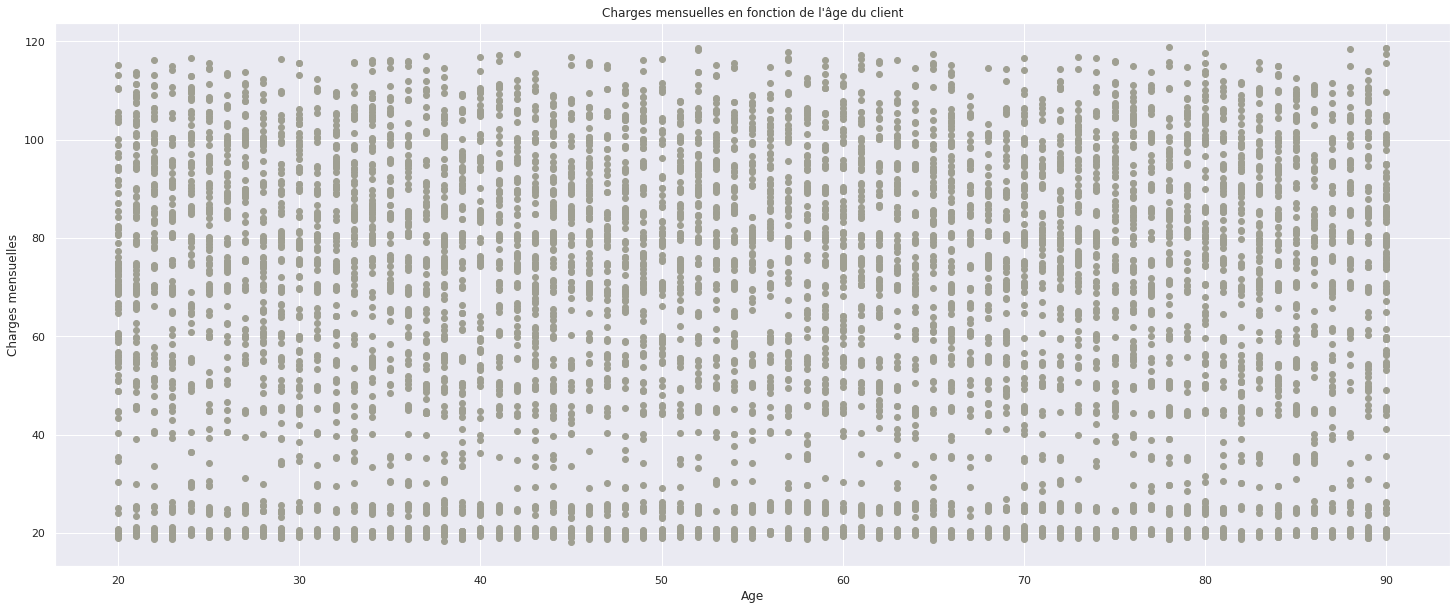

In [5]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

plt.scatter(dataset.loc[:, 'Age'], dataset.loc[:, 'MonthlyCharges'], c='#9F9F92')
plt.gcf().set_size_inches((25, 10)) 

plt.title("Charges mensuelles en fonction de l'âge du client")
plt.xlabel('Age')
plt.ylabel('Charges mensuelles')

plt.show()

Sur le graphique "*Charges mensuelles en fonction de l'âge du client*" on peut voir que les données récoltées semblent très homogènes. \
Si on retire quelques données pour avoir une vision plus claire de l'ensemble on voit qu'elles sont très similaires, mais il semble tout de même que les clients de 20 ans ont des mensualités plus élevées.

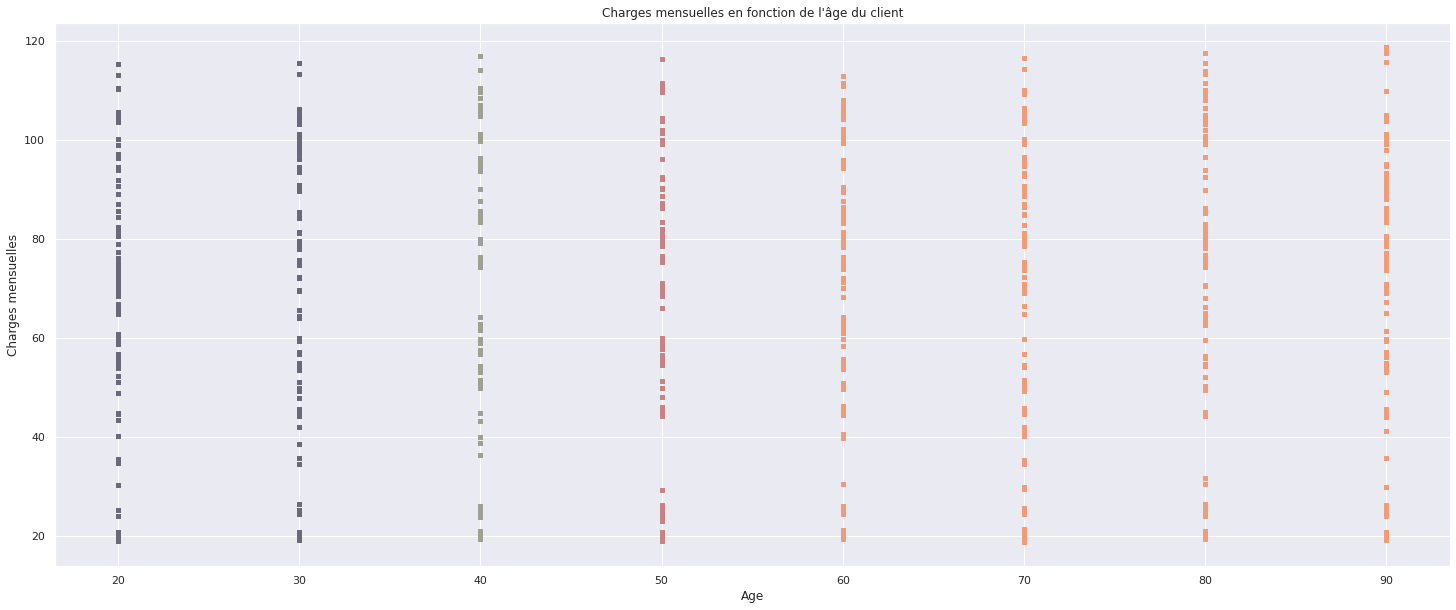

In [6]:
fig = plt.figure()
plt.gcf().set_size_inches((25, 10)) 
ax1 = fig.add_subplot(111)

plt.title("Charges mensuelles en fonction de l'âge du client")
plt.xlabel('Age')
plt.ylabel('Charges mensuelles')
colors = ['#6A687A', '#C78283', '#9F9F92', '#F19C79', '#A44A3F']

# Itération qui créé un scatter pour les clients entre 20 et 90 ans avec 10 ans de pas
age = 20
while age <= 90: 
    dataset_sort = dataset[dataset['Age'] == age]
    ax1.scatter(
        dataset_sort.loc[:, 'Age'], 
        dataset_sort.loc[:, 'MonthlyCharges'], 
        s = 10, marker = "s", 
        label = '{} ans'.format(age),
        color = random.choice(colors)
    )
    age = age + 10;

plt.show()

------

### Recherche des données pour répondre à la problématique
(*Données discrètes*)

Un des facteurs qui impactera sur les mensualités des clients est le choix du contrat, nous l'avons vu dans le premier diagramme. \
Pour observer cela nous allons comparer trois diagrammes qui permettent d'observer les mensualités en fonction du type de contrat et de l'âge des clients.

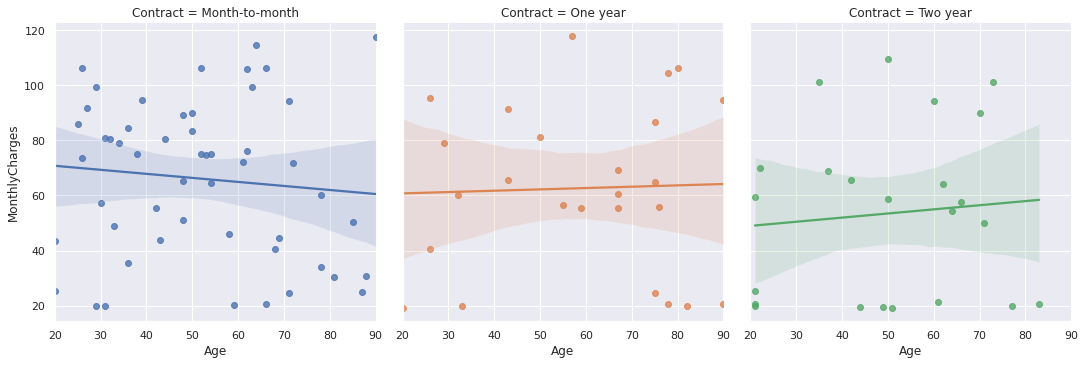

In [7]:
# https://seaborn.pydata.org/examples/logistic_regression.html

diagram = sns.lmplot(x="Age", y="MonthlyCharges", col="Contract", hue="Contract", data=dataset_sample)

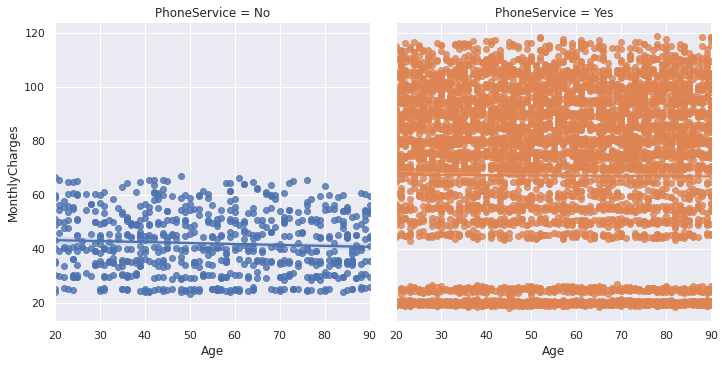

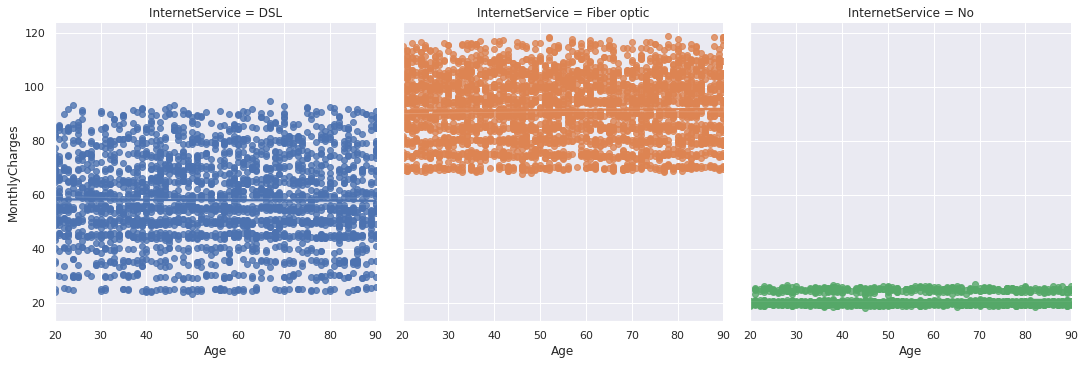

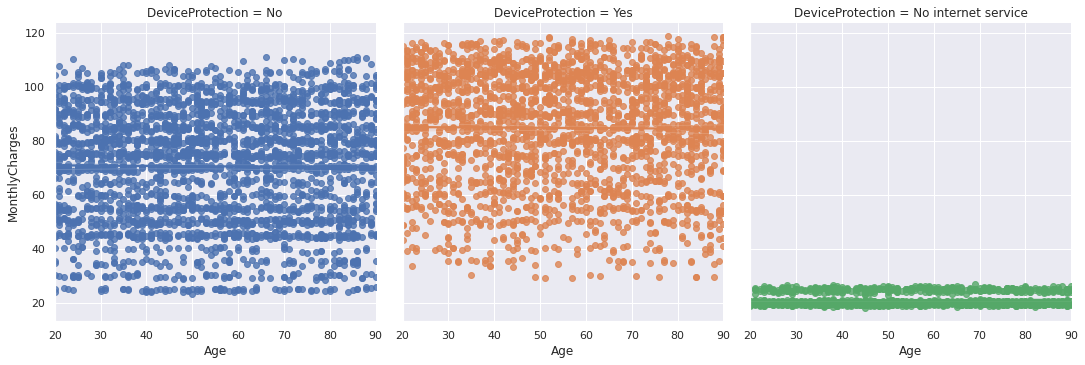

In [8]:
# https://seaborn.pydata.org/examples/logistic_regression.html

diagram = sns.lmplot(x="Age", y="MonthlyCharges", col="PhoneService", hue="PhoneService", data=dataset)
diagram2 = sns.lmplot(x="Age", y="MonthlyCharges", col="InternetService", hue="InternetService", data=dataset)
diagram3 = sns.lmplot(x="Age", y="MonthlyCharges", col="DeviceProtection", hue="DeviceProtection", data=dataset)

Grâce à ces diagrammes nous pouvons voir qu'effectivement les mensualités des utilisateurs sont impactées par les services auxquels le client est abonné. 

In [9]:
# Récupération des données concernant les utilisateurs qui possèdent plusieurs abonnements

dataset_has_service = dataset[dataset['PhoneService'] == 'Yes']
dataset_has_service = dataset_has_service[dataset_has_service['InternetService'] == 'Fiber optic']
dataset_has_service = dataset_has_service[dataset_has_service['DeviceProtection'] == 'Yes']

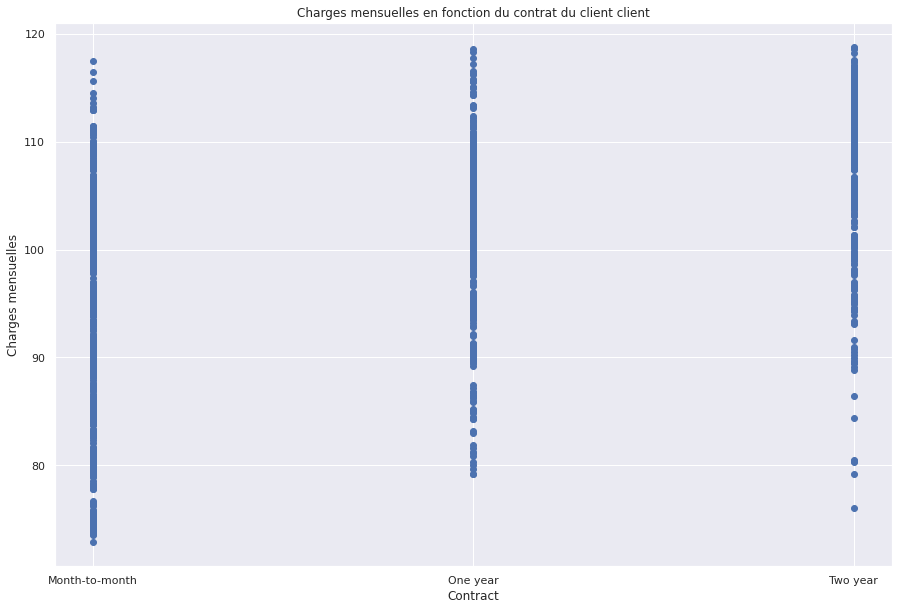

In [10]:
# Affichage du diagramme des charges mensuelles en fonction des contrats, avec les données des utilisateurs récupérées précédemment

plt.scatter(dataset_has_service.loc[:, 'Contract'], dataset_has_service.loc[:, 'MonthlyCharges'])
plt.gcf().set_size_inches((15, 10)) 

plt.title("Charges mensuelles en fonction du contrat du client client")
plt.xlabel('Contract')
plt.ylabel('Charges mensuelles')

plt.show()

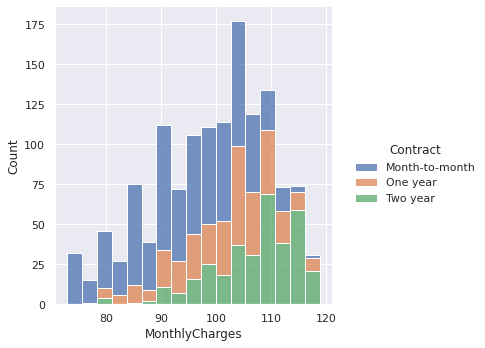

In [11]:
diagram2 = sns.displot(dataset_has_service, x="MonthlyCharges", hue="Contract", multiple="stack") 

Ici nous constatons qu'un client possédant toutes les options sur son contrat avec un contrat mensuel lui coûtera beaucoup moins qu'à quelqu'un qui possède un contrat annuel ou bi-annuel.

In [12]:
# Récupération des données concernant les utilisateurs qui ne possèdent pas d'abonnement

dataset_has_no_service = dataset[dataset['PhoneService'] == 'No']
dataset_has_no_service = dataset_has_no_service[dataset_has_no_service['DeviceProtection'] == 'No']

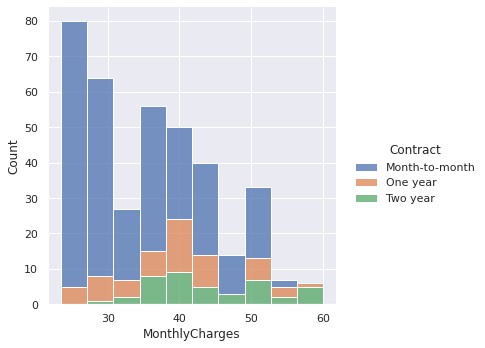

In [13]:
# Affichage du diagramme des charges mensuelles en fonction des contrats, avec les données des utilisateurs récupérées précédemment

diagram2 = sns.displot(dataset_has_no_service, x="MonthlyCharges", hue="Contract", multiple="stack") 

Grâce au diagramme ci-dessus nous voyons que les clients qui n'ont pas d'option et un contrat mensuel ont des mensualités bien moins élévées que les contrats annuels ou bi-annuels sans option.

#### Anaylise des charges en fonction du contrat
Les prochains diagrammes représentent les charges en fonction du contrat : 
- toutes les données
- données triées : uniquement avec abonnement
- données triées : sans abonnement

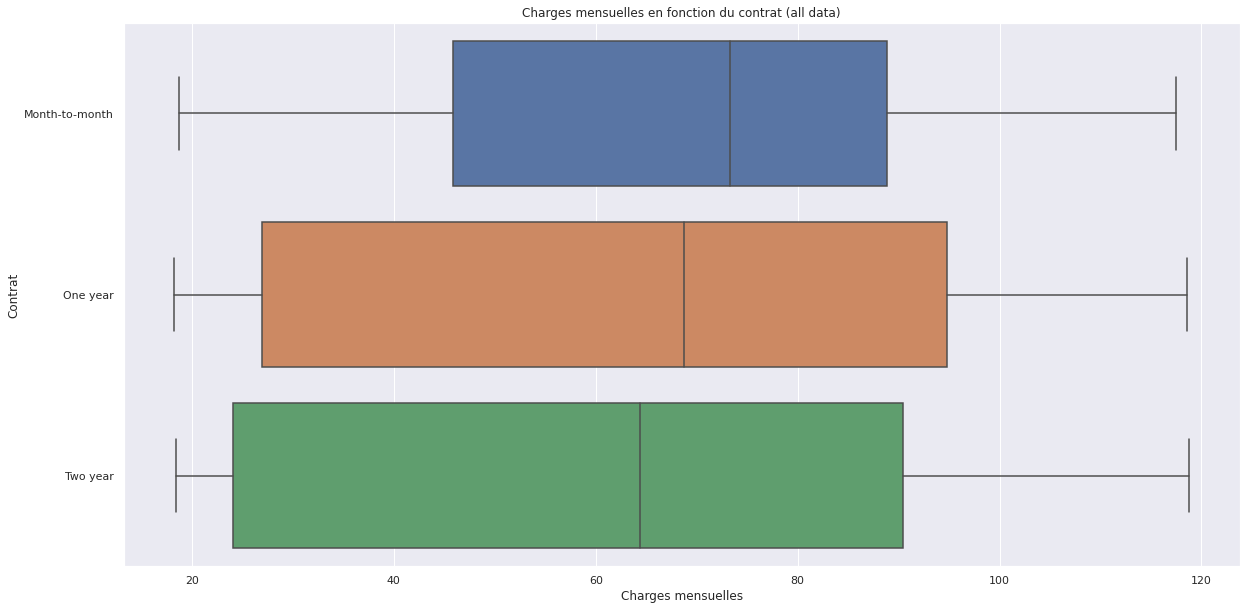

In [14]:
sns.boxplot(x="MonthlyCharges", y="Contract", data=dataset)

plt.title("Charges mensuelles en fonction du contrat (all data)")
plt.xlabel('Charges mensuelles')
plt.ylabel('Contrat')

plt.gcf().set_size_inches((20, 10)) 

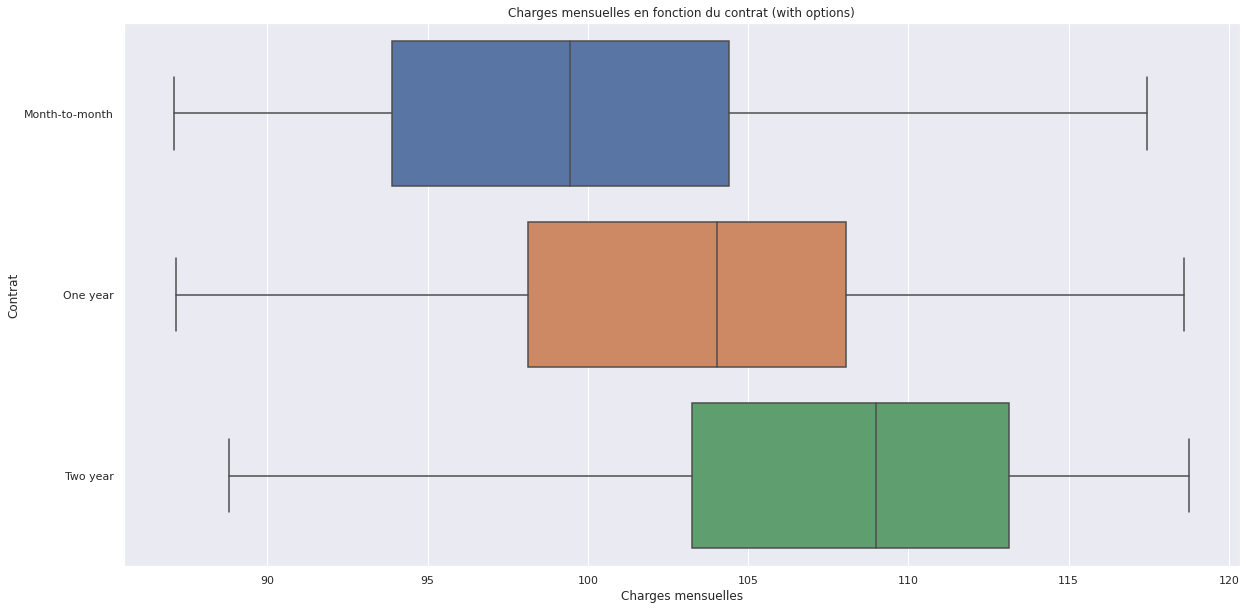

In [18]:
dataset_adjusted = dataset_has_service[(dataset_has_service['MonthlyCharges'] > 87)] # Retrait des valeurs absurdes

sns.boxplot(x="MonthlyCharges", y="Contract", data=dataset_adjusted)

plt.title("Charges mensuelles en fonction du contrat (with options)")
plt.xlabel('Charges mensuelles')
plt.ylabel('Contrat')

plt.gcf().set_size_inches((20, 10)) 

Charges mensuelles comprises entre environ 90 et 115

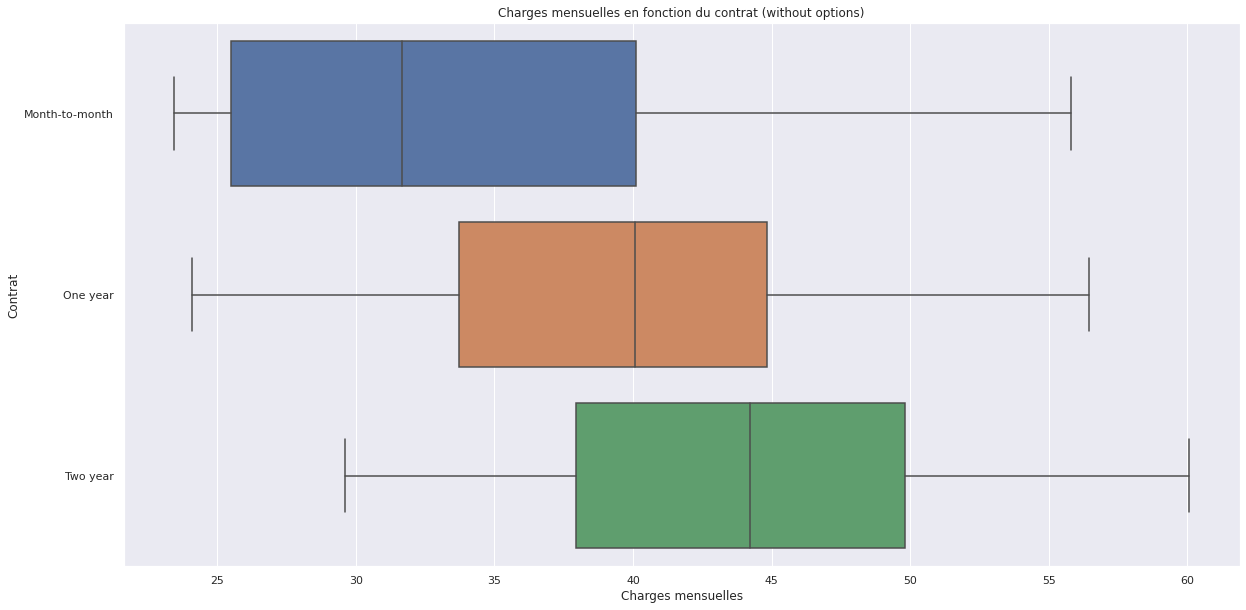

In [19]:
sns.boxplot(x="MonthlyCharges", y="Contract", data=dataset_has_no_service)

plt.title("Charges mensuelles en fonction du contrat (without options)")
plt.xlabel('Charges mensuelles')
plt.ylabel('Contrat')

plt.gcf().set_size_inches((20, 10)) 

Charges mensuelles comprises entre environ 25 et 50

## Conclusion 
Grâce aux diagrammes présentés précédement nous pouvons en conclure que les charges mensuelles des clients sont liées aux options souscrites mais surtout au contrat sélectionné. En effet, on remarque que peu importe les cas d'usage, les clients possédant un contrat mensuel aura des mensualités bien moins onéreuses qu'un client sous contrat annuel ou bi-annuel. \
On peut en venir à se demander si les clients son satisfaits des services proposés pour le prix auquel on les trouve.

### Satisfaction des clients
(*données catégoriques*)

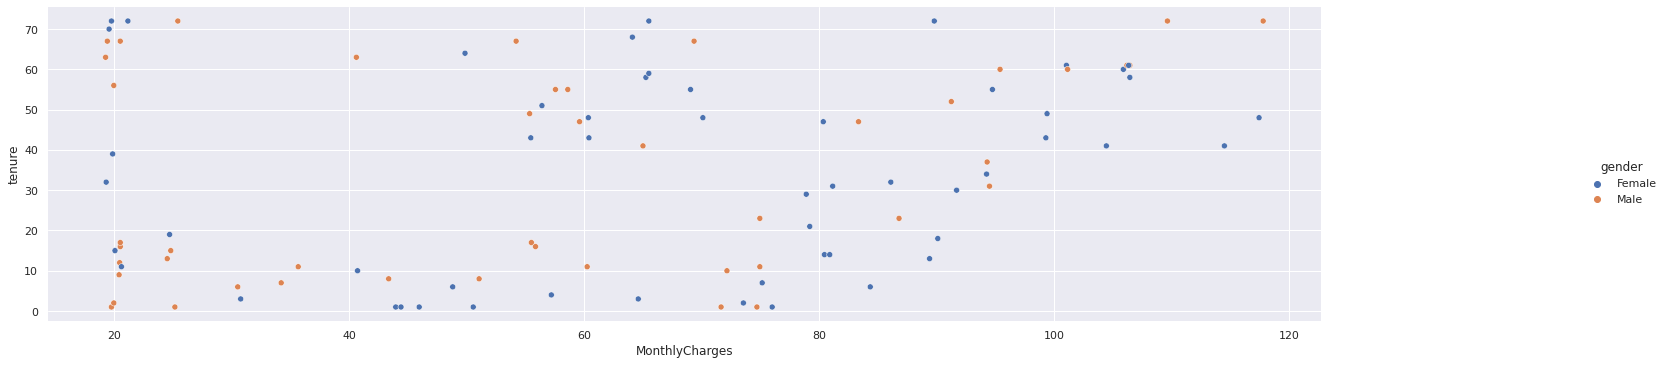

In [20]:
g = sns.relplot(data=dataset_sample, x="MonthlyCharges", y="tenure", hue="gender")
plt.gcf().set_size_inches((25, 5)) 
g.despine(left=True, bottom=True)

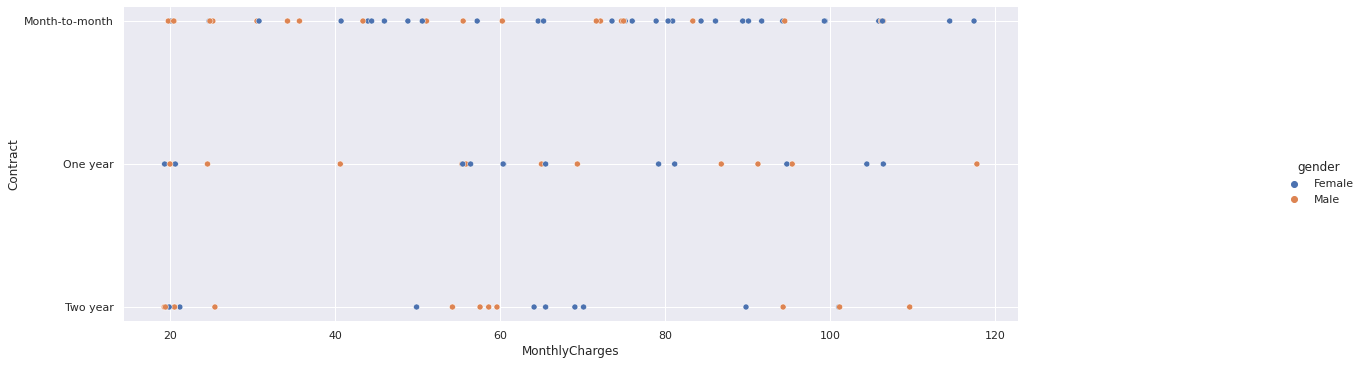

In [21]:
g = sns.relplot(data=dataset_sample, x="MonthlyCharges", y="Contract", hue="gender")
plt.gcf().set_size_inches((25, 5)) 
g.despine(left=True, bottom=True)

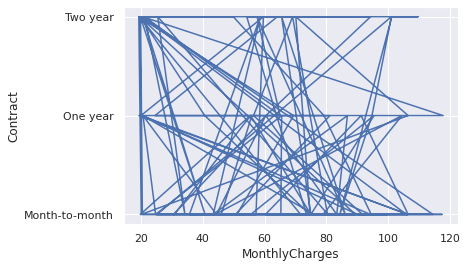

In [22]:
# plt.figure(figsize=(10,10))
# dataset.total_gross.plot(kind='bar');


x = dataset_sample.loc[:, 'MonthlyCharges']
y = dataset_sample.loc[:, 'Contract']

plt.plot(x,y)
# plt.gcf().set_size_inches((25, 5)) 

plt.xlabel('MonthlyCharges')
plt.ylabel('Contract')

# plt.savefig('image.png')
plt.show()

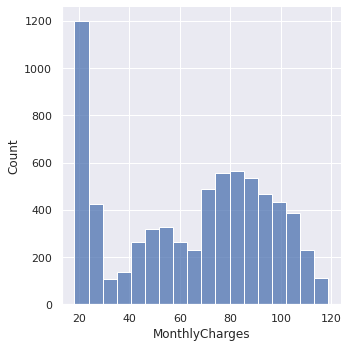

In [23]:
sns.displot(dataset.MonthlyCharges) 

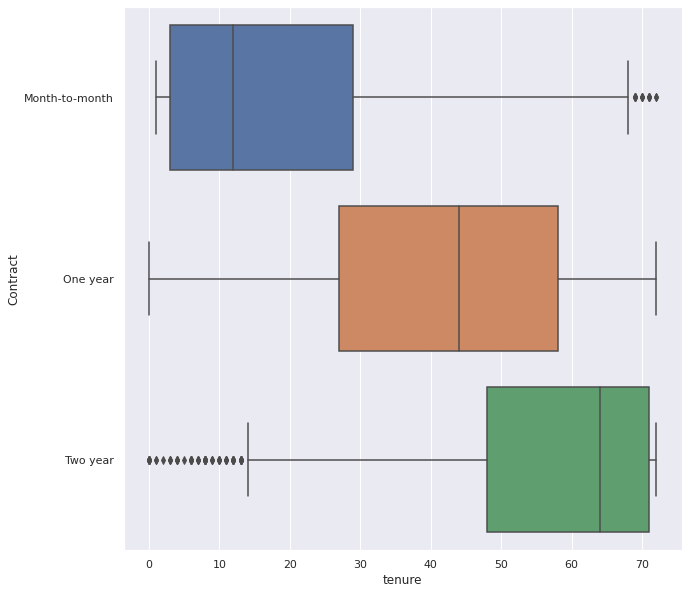

In [24]:
sns.boxplot(x="tenure", y="Contract", data=dataset)
plt.gcf().set_size_inches((10, 10)) 

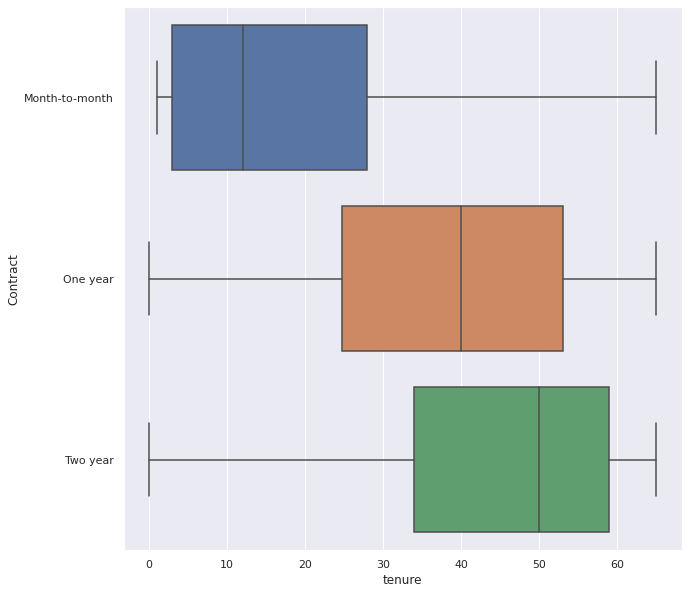

In [25]:
dataset_adjusted = dataset[(dataset['tenure'] < 66)]

sns.boxplot(x="tenure", y="Contract", data=dataset_adjusted)
plt.gcf().set_size_inches((10, 10)) 

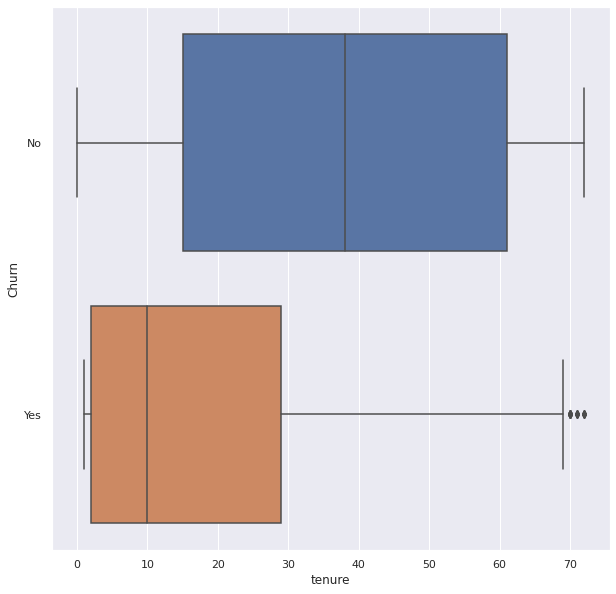

In [26]:
sns.boxplot(x="tenure", y="Churn", data=dataset)
plt.gcf().set_size_inches((10, 10)) 

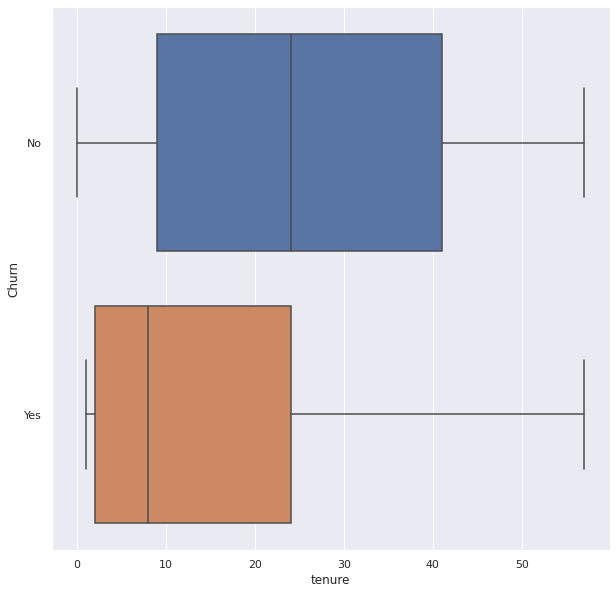

In [27]:
dataset_adjusted = dataset[dataset["tenure"] < 58]
sns.boxplot(x="tenure", y="Churn", data=dataset_adjusted)
plt.gcf().set_size_inches((10, 10)) 

In [ ]:
x = dataset.loc[:, 'tenure']
y = dataset.loc[:, 'StreamingMovies']

plt.scatter(x,y, 1.8)
# plt.gcf().set_size_inches((10, 10)) 

plt.title('Nuage de points')
plt.xlabel('tenure')
plt.ylabel('StreamingMovies')

# plt.savefig('exercice1.png')
plt.show()

In [ ]:
diagram = sns.displot(dataset.Age, height=10, aspect=2) 